In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# autoreload
%load_ext autoreload
%autoreload 2

# Define Inputs

In [7]:
# inputs: code-ocean 

data_folder = Path("/root/capsule/data/") # Note: full path, glob doesn't like ~
processed_path = data_folder / "multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44"
plane_folder_path = processed_path / "1287841795" # 1 of 8 possible planes
raw_path = data_folder / "multiplane-ophys_677594_2023-08-04_09-44-08"

In [ ]:
# inputs: local

# processed_path = "/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/"
# expt_folder_path = "/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1299958728/processed/1299958728"


# Grab Ophys / Behavior 

In [11]:
from data_objects.ophys.grab_ophys import GrabOphys
go = GrabOphys(plane_folder_path)
go.file_paths

{'platform_json': PosixPath('/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44/1287841795/1287701514_platform.json'),
 'processing_json': PosixPath('/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44/1287841795/processing.json'),
 'params_json': PosixPath('/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44/1287841795/events/1287841795_params.json'),
 'registered_metrics_json': PosixPath('/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44/1287841795/movie_qc/1287841795_registered_metrics.json'),
 'output_json': PosixPath('/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44/1287841795/segmentation/segmentation_output.json'),
 'average_projection_png': PosixPath('/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44/1287841795/motion_correction

# Scrach: x-array

<xarray.DataArray 'RMSE' ()>
array(0.00506034)
Coordinates:
    cell_roi_id  int64 2

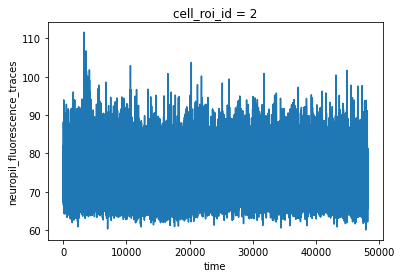

In [98]:
import xarray as xr
dataset = OphysDataset("/allen/programs/mindscope/workgroups/learning/mattd/co_dev/data/1098444819")
x = dataset.neuropil_traces_xr

# get cell_roi_id 0 from x 
cell_roi_id = 1
x.sel(cell_roi_id=cell_roi_id).neuropil_fluorescence_traces.plot.line()
x.sel(cell_roi_id=cell_roi_id).RMSE


# OphysPlaneDataset

In [8]:
from data_objects.ophys.ophys_plane_dataset import OphysPlaneDataset

In [9]:
dataset = OphysPlaneDataset(expt_folder_path=plane_folder_path, verbose=True)


_platform.json: 1287841795/1287701514_platform.json
processing.json: 1287841795/processing.json
_params.json: events/1287841795_params.json
_registered_metrics.json: movie_qc/1287841795_registered_metrics.json
_output.json: segmentation/segmentation_output.json
_average_projection.png: motion_correction/1287841795_average_projection.png
_max_projection.png: not found
_motion_transform.csv: motion_correction/1287841795_motion_transform.csv
segmentation_output.json: segmentation/segmentation_output.json
roi_traces.h5: trace_extraction/roi_traces.h5
neuropil_correction.h5: neuropil_correction/neuropil_correction.h5
neuropil_masks.json: trace_extraction/neuropil_masks.json
neuropil_trace_output.json: neuropil_correction/neuropil_trace_output.json
demixing_output.h5: demixing/demixing_output.h5
demixing_output.json: demixing/demixing_output.json
dff.h5: dff/dff.h5
extract_traces.json: trace_extraction/extract_traces.json
events_oasis.h5: events/1287841795_events_oasis.h5


In [15]:
dataset.dff_traces

,dff,baseline,noise,skewness
cell_specimen_id,,,,
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
1,"[0.3501062935922123, 0.477602021911333, 0.4312...","[505.6397040812572, 505.6397040812572, 505.639...",55.879718,1.047109
10,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
11,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
12,"[0.18570515943607185, 0.1590643114591885, 0.26...","[806.269570249312, 806.6308185003484, 806.4501...",42.348114,0.844889
...,...,...,...,...
85,"[0.10481134856622669, 0.030425329330776477, 0....","[408.9423018190653, 408.8236278429837, 408.823...",44.430887,0.480789
86,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
87,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN


# BehaviorSession

In [51]:
from data_objects.behavior.behavior_dataset import BehaviorDataset
bs = BehaviorDataset(raw_path)

In [52]:
bs.licks

,timestamps,frame
0,252.08759,13845
1,321.93027,18032
2,322.64779,18075
3,327.78489,18383
4,330.83745,18566
5,343.43138,19321
6,351.10461,19781
7,390.15450,22122
8,434.30901,24769
9,434.59185,24786


,timestamps,frame
timestamps,1.0,1.0
frame,1.0,1.0


In [53]:
bs.licks.frame.diff()

0        NaN
1     4187.0
2       43.0
3      308.0
4      183.0
5      755.0
6      460.0
7     2341.0
8     2647.0
9       17.0
10    1462.0
11    2210.0
12      17.0
13    2319.0
14    3650.0
15     990.0
16      17.0
17    3710.0
18    2036.0
19      10.0
20    2152.0
21     679.0
22      19.0
23    3078.0
24      10.0
Name: frame, dtype: float64

In [54]:
bs.licks.timestamps.diff()

0          NaN
1     69.84268
2      0.71752
3      5.13710
4      3.05256
5     12.59393
6      7.67323
7     39.04989
8     44.15451
9      0.28284
10    24.38748
11    36.86506
12     0.28280
13    38.68293
14    60.88463
15    16.51467
16     0.28274
17    61.88581
18    33.96265
19     0.16621
20    35.89767
21    11.32635
22     0.31613
23    51.34406
24     0.16604
Name: timestamps, dtype: float64

In [25]:
bs.behavior_stimulus_file.data['items']['behavior']

{'ai': 'Invalid or cleared Task',
 'trial_count': 409,
 'ao': 'Invalid or cleared Task',
 'lick_sensors': [{'items': OrderedDict(),
   'lick_events': [13845,
    18032,
    18075,
    18383,
    18566,
    19321,
    19781,
    22122,
    24769,
    24786,
    26248,
    28458,
    28475,
    30794,
    34444,
    35434,
    35451,
    39161,
    41197,
    41207,
    43359,
    44038,
    44057,
    47135,
    47145],
   'lick_data': (array([13845, 13846, 13847, 18032, 18033, 18034, 18035, 18075, 18076,
           18077, 18078, 18383, 18384, 18385, 18566, 18567, 18568, 19321,
           19322, 19323, 19781, 19782, 19783, 22122, 22123, 22124, 24769,
           24770, 24771, 24786, 24787, 24788, 24789, 26248, 26249, 26250,
           26251, 28458, 28459, 28460, 28461, 28475, 28476, 28477, 28478,
           30794, 30795, 30796, 34444, 34445, 34446, 35434, 35435, 35436,
           35451, 35452, 35453, 35454, 39161, 39162, 39163, 39164, 41197,
           41198, 41199, 41207, 41208, 41209, 

In [ ]:
# note: calculate running speed, lower temporal resolution; 

In [10]:
bs.running_speed

,timestamps,speed
0,21.14431,1.165418e-02
1,21.15926,1.055290e-01
2,21.17594,2.010443e-01
3,21.19260,2.982067e-01
4,21.20930,3.953372e-01
...,...,...
270015,4525.31627,2.844593e-65
270016,4525.33299,1.826045e-65
270017,4525.34966,8.917372e-66
270018,4525.36632,1.474630e-66


(500.0, 600.0)

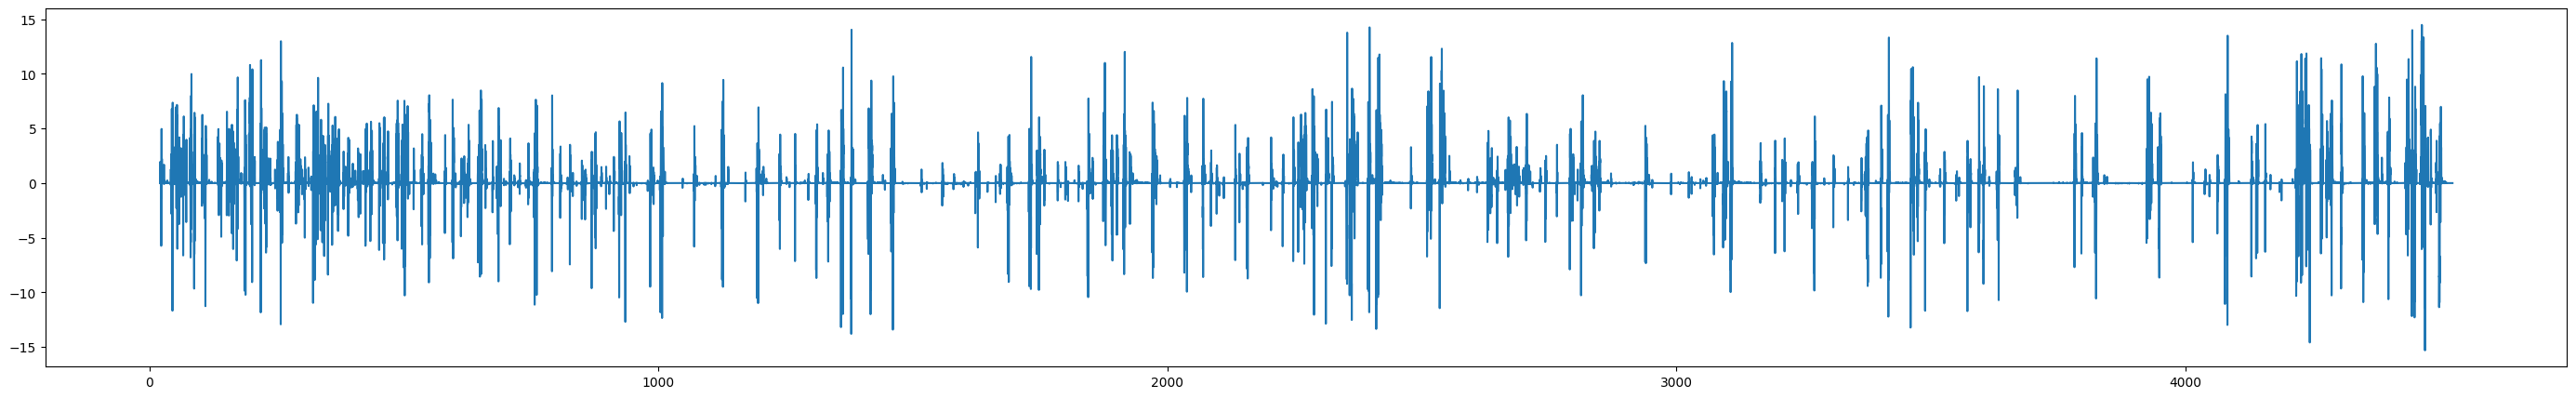

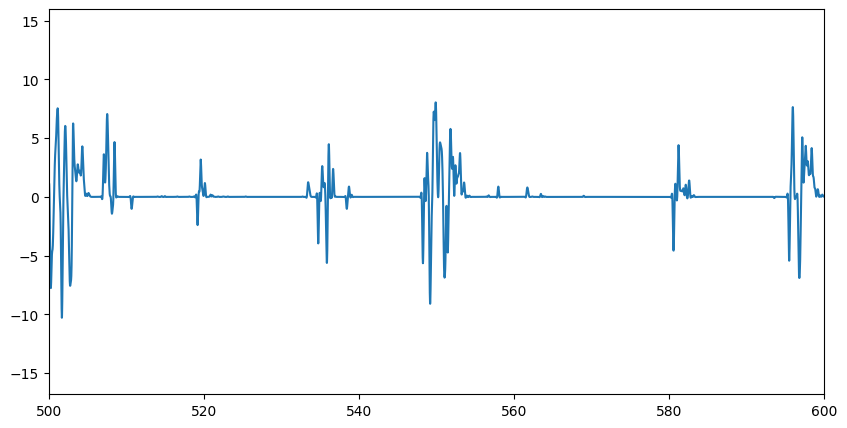

In [11]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(35, 5))
plt.plot(bs.running_speed.timestamps, bs.running_speed.speed)

# plot zoom on x
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(bs.running_speed.timestamps, bs.running_speed.speed)
plt.xlim(500, 600)

In [26]:
bs.stimulus_presentations

,duration,end_frame,image_name,index,omitted,orientation,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,
0,0.24999,18000.0,im000,0,False,NaN,17985,321.14628,321.39627
1,0.25018,18046.0,im000,1,False,NaN,18031,321.91328,322.16346
2,0.24967,18090.0,im000,2,False,NaN,18075,322.64779,322.89746
3,0.24985,18135.0,im000,3,False,NaN,18120,323.39822,323.64807
4,0.25032,18180.0,im000,4,False,NaN,18165,324.14856,324.39888
...,...,...,...,...,...,...,...,...,...
4796,0.25008,233823.0,im035,4600,False,NaN,233808,3921.35600,3921.60608
4797,0.25016,233868.0,im035,4601,False,NaN,233853,3922.10642,3922.35658
4798,0.25017,233913.0,im035,4602,False,NaN,233898,3922.85711,3923.10728


In [48]:
sts = bs.stimulus_timestamps

In [18]:
bs

data_objects.biometrics.licks.Licks

# PKL file reading/debug

In [ ]:
# not downloaded: 20230929_692478_ophys2_175_275, 1300393608, Slc32a1-IRES-Cre;Oi1, LearningmFISHDevelopment
# main experiemnt: 20230927_692478_stage_1_175_275_, 1299958728, Slc32a1-IRES-Cre;Oi1, LearningmFISHDevelopment
    # + 1300116380 = VISp 175
    # + 1300116382 = VISp 275

In [25]:
from data_objects.behavior.grab_behavior import GrabBehavior
gbo = GrabBehavior(raw_path)
pkl_file = pd.read_pickle(gbo.file_paths["stimulus_pkl"])

In [31]:
# print all keys in nested dictionary pkl_file
def print_keys(d, indent=0):
    for k, v in d.items():
        print("  " * indent + k)
        if isinstance(v, dict):
            print_keys(v, indent+1)

print_keys(pkl_file)

comp_id
unpickleable
items
  behavior
    ai
    trial_count
    ao
    lick_sensors
    rewards_dispensed
    volume_dispensed
    encoders
    behavior_path
    config_path
    auto_update
    trial_log
    window
      scrDistCM
      flipCounter
      warpGridsize
      color
      colorSpace
      pos
      useFBO
      recordFrameIntervalsJustTurnedOn
      origGammaRamp
      mon_height_pix
      aspect
      frames
      viewScale
      size
      ygrid
      monitor
        calibs
          2019_01_11 09:03
            distance
            psychopyVersion
            gammaGrid
            sizePix
            notes
            width
            linearizeMethod
            calibDate
            usebits
            gamma
        _gammaInterpolator
        name
        __type__
        autoLog
        currentCalib
          distance
          psychopyVersion
          gammaGrid
          sizePix
          notes
          width
          linearizeMethod
          calibDate
        

In [36]:
pkl_file["items"]["behavior"]["lick_sensors"][0].keys()

dict_keys(['items', 'lick_events', 'lick_data', 'line', 'unpickleable'])

In [39]:
pkl_file["items"]["behavior"]["lick_sensors"][0]["lick_data"]  

(array([13845, 13846, 13847, 18032, 18033, 18034, 18035, 18075, 18076,
        18077, 18078, 18383, 18384, 18385, 18566, 18567, 18568, 19321,
        19322, 19323, 19781, 19782, 19783, 22122, 22123, 22124, 24769,
        24770, 24771, 24786, 24787, 24788, 24789, 26248, 26249, 26250,
        26251, 28458, 28459, 28460, 28461, 28475, 28476, 28477, 28478,
        30794, 30795, 30796, 34444, 34445, 34446, 35434, 35435, 35436,
        35451, 35452, 35453, 35454, 39161, 39162, 39163, 39164, 41197,
        41198, 41199, 41207, 41208, 41209, 43359, 43360, 43361, 43362,
        44038, 44039, 44040, 44057, 44058, 44059, 47135, 47136, 47137,
        47138, 47145, 47146, 47147]),)

In [44]:
ts =pkl_file["items"]["behavior"]['intervalsms']

ts[1]


16.679000109434128

In [30]:
len(pkl_file["items"]["behavior"]["lick_sensors"][0]["lick_events"])

25

In [6]:
pkl_file["items"]["foraging"]["encoders"]

[{'counter_index': 0,
  'distance': array([91.706635  ,  0.2158311 ,  0.2158311 , ...,  0.6007299 ,
          0.59353554,  0.58274394], dtype=float32),
  'mdr0_register_setting': '3',
  'base_time': 0,
  'unpickleable': [],
  'timestamp': array([   0.      ,   10.268576,   10.285456, ..., 3755.4646  ,
         3755.4814  , 3755.498   ], dtype=float32),
  'arduino_version': '0.1.6+gb8626a0.b82975',
  'treadmill': False,
  'vin': array([5., 5., 5., ..., 5., 5., 5.]),
  'vsig': [0.560302734375,
   0.596923828125,
   0.633544921875,
   0.6695556640625,
   0.7049560546875,
   0.7403564453125,
   0.7763671875,
   0.8123779296875,
   0.849609375,
   0.885009765625,
   0.921630859375,
   0.958251953125,
   1.0333251953125,
   1.0333251953125,
   1.0699462890625,
   1.143798828125,
   1.143798828125,
   1.1798095703125,
   1.2493896484375,
   1.2835693359375,
   1.2835693359375,
   1.35009765625,
   1.3818359375,
   1.414794921875,
   1.44775390625,
   1.4801025390625,
   1.5130615234375,
   1.

## Sync File Debug

In [35]:
from data_objects.sync.sync_dataset import SyncDataset
sync = SyncDataset(bd.file_paths['sync_file'])

In [59]:
sync.line_labels

['vsync_2p',
 '',
 'vsync_stim',
 '',
 'stim_photodiode',
 'stim_running',
 '',
 '',
 'beh_frame_received',
 'eye_frame_received',
 'face_frame_received',
 '',
 '',
 '',
 '',
 '',
 '',
 'stim_running_opto',
 'stim_trial_opto',
 '',
 '',
 'beh_cam_frame_readout',
 'face_cam_frame_readout',
 '',
 '',
 'eye_cam_frame_readout',
 '',
 'beh_cam_exposing',
 'face_cam_exposing',
 'eye_cam_exposing',
 '',
 'lick_sensor']

In [53]:
sync.get_line('vsync_2p')

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [54]:
sync.line_stats(line='lick_sensor')

In [60]:
sync.stats()

[{'line': 0,
  'bit': 0,
  'total_data_points': 3448517,
  'total_events': 285718,
  'total_rising': 142859,
  'total_falling': 142859,
  'avg_period': 0.026293564263564263,
  'min_period': 0.02628,
  'max_period': 0.0263,
  'period_sd': 0.0,
  'avg_freq': 38.032120330895125,
  'duty_cycle': 'fix me'},
 {'line': 2,
  'bit': 2,
  'total_data_points': 3448517,
  'total_events': 449040,
  'total_rising': 224520,
  'total_falling': 224520,
  'avg_period': 0.016681135944556783,
  'min_period': 0.00452,
  'max_period': 0.03817,
  'period_sd': 0.0,
  'avg_freq': 59.947955782130634,
  'duty_cycle': 'fix me'},
 {'line': 4,
  'bit': 4,
  'total_data_points': 3448517,
  'total_events': 3764,
  'total_rising': 1882,
  'total_falling': 1882,
  'avg_period': 1.9982563936170215,
  'min_period': 0.16677,
  'max_period': 5.17105,
  'period_sd': 0.0,
  'avg_freq': 0.500436281947739,
  'duty_cycle': 'fix me'},
 {'line': 5,
  'bit': 5,
  'total_rising': 1,
  'total_falling': 1,
  'avg_freq': None,
  'duty

In [55]:
sync.plot_all()

TypeError: plot_all() missing 2 required positional arguments: 'start_time' and 'stop_time'

# BehaviorOphysDataset

In [45]:
from data_objects.behavior_ophys_dataset import BehaviorOphysDataset

In [ ]:
bod = BehaviorOphysDataset(raw_path, expt_folder_path)

In [6]:
pkl_file = bod.behavior_stimulus_file

Currently sync file stored in raw data assest, will load since raw_folder_path is provided (02/01/2024)


TypeError: expected str, bytes or os.PathLike object, not NoneType

In [ ]:
# code ocean input
# careful glob doesnt likes tilde ~
processed_path = "/root/capsule/data/multiplane-ophys_677594_2023-08-04_09-44-08_processed_2024-02-08_23-26-44"
expt_folder_path = processed_path + "/1287841795"
dataset = OphysPlaneDataset(expt_folder_path=expt_folder_path, verbose=True)

In [104]:
pkl_file

In [33]:
bod.dff_traces

,dff,baseline,noise,skewness
cell_specimen_id,,,,
0,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
1,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",NaN,NaN
10,"[0.2590196997004517, 0.18960400179453218, 0.24...","[2418.167761571288, 2418.167761571288, 2418.16...",162.071484,0.322384
11,"[0.14345842641369522, 0.26765181864374543, 0.1...","[1332.4583180076627, 1332.4583180076627, 1332....",112.761395,0.755166
12,"[0.17683583095468602, 0.10960230885661967, 0.1...","[1722.1217291917526, 1722.1217291917526, 1722....",104.438841,0.597191
...,...,...,...,...
78,"[0.22188464416922554, 0.198864316383394, 0.174...","[1348.4292018823528, 1348.816582117647, 1348.4...",262.590612,0.351564
79,"[-0.16801624232420329, -0.09458193923232106, 0...","[1142.6892315256105, 1142.6892315256105, 1142....",223.650668,0.342916
8,"[0.33118886469094383, 0.11138697404849598, 0.3...","[1377.131721038961, 1377.131721038961, 1377.13...",127.592855,1.859951
